#  t-Test <hr style="border:2.5px solid #2e0436"></hr>

<b><i>Rica Galagate</i></b>
<br>Computer Engineer/Technician</br>

In [30]:
# imports and packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestPower

In [31]:
# load dataset
df = pd.read_csv(r"CSV_files-Endterm\electricity-normal-sample.csv",
                 delimiter=",")
df

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,1307,612,1939,1127,1076,126,52
1,1288,680,1724,1167,1233,173,57
2,1255,721,1961,1170,1193,178,56
3,1336,692,1715,1077,1138,112,54
4,1238,682,1859,1136,1126,188,55
5,1273,752,1920,1197,1105,137,57
6,1233,601,2048,1098,1102,172,56
7,1337,685,1935,1234,1099,223,53
8,1274,771,1896,1149,1182,173,57
9,1333,761,1944,1078,1207,189,54


In [32]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nuclear        50 non-null     int64
 1   Wind           50 non-null     int64
 2   Hydroelectric  50 non-null     int64
 3   Oil and Gas    50 non-null     int64
 4   Coal           50 non-null     int64
 5   Solar          50 non-null     int64
 6   Biomass        50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB


In [33]:
# summary of statistics
df.describe()

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1264.800000,706.960000,1850.440000,1128.140000,1136.260000,169.620000,54.900000
std,39.036874,77.876396,114.100593,61.561985,41.269057,39.646854,2.052873
min,1137.000000,555.000000,1601.000000,1000.000000,1051.000000,95.000000,50.000000
25%,1241.250000,664.500000,1769.000000,1090.250000,1107.750000,139.500000,54.000000
50%,1268.000000,705.500000,1840.000000,1127.500000,1133.000000,169.500000,55.000000
75%,1292.750000,749.750000,1938.000000,1164.250000,1159.750000,193.750000,56.000000
max,1337.000000,922.000000,2063.000000,1297.000000,1233.000000,254.000000,59.000000


# Data Cleaning

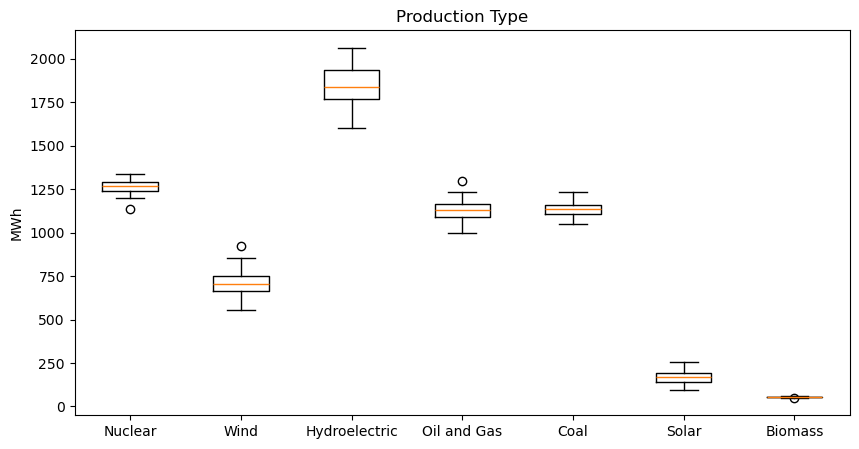

In [34]:
# check for outliers
plt.figure(figsize=(10,5))
plt.boxplot(df[['Nuclear','Wind','Hydroelectric','Oil and Gas','Coal','Solar','Biomass']],
            tick_labels=df.columns)
plt.title('Production Type')
plt.ylabel('MWh')
#plt.xticks(rotation=45)
plt.show()

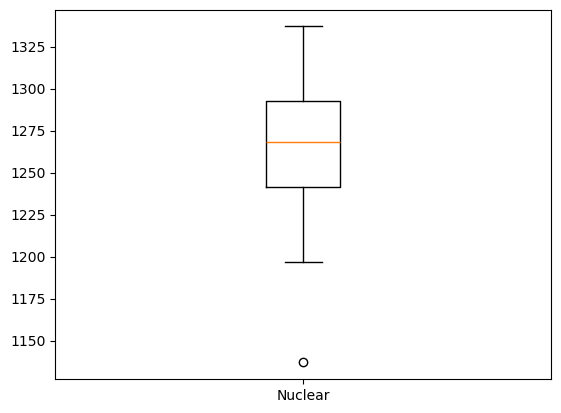

In [35]:
# nuclear
plt.boxplot(df['Nuclear'],tick_labels=['Nuclear'])
plt.show()

In [36]:
# removing 3-sigma outliers
z_nuclear = stats.zscore(df['Nuclear'])
nuc_outliers = (z_nuclear<-3)|(z_nuclear>3)
df = df[~nuc_outliers]

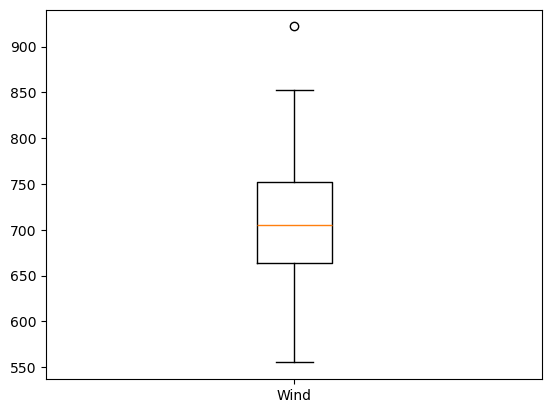

In [37]:
# wind
# removing 3-sigma outliers
z_wind = stats.zscore(df['Wind'])
wind_outliers = (z_wind<-3)|(z_wind>3)
df = df[~wind_outliers]

plt.boxplot(df['Wind'],tick_labels=['Wind'])
plt.show()

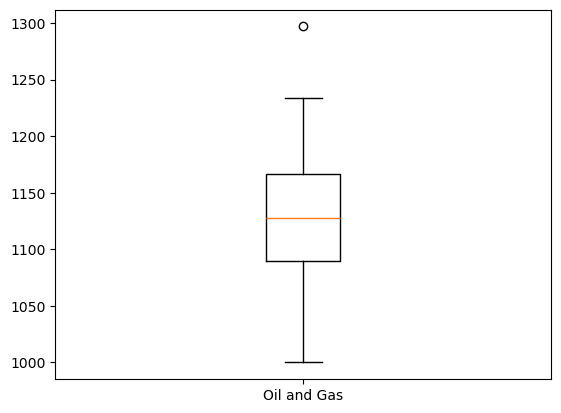

In [38]:
# oil and gas
# removing 3-sigma outliers
z_oil = stats.zscore(df['Oil and Gas'])
oil_outliers = (z_oil<-3)|(z_oil>3)
df = df[~oil_outliers]

plt.boxplot(df['Oil and Gas'],tick_labels=['Oil and Gas'])
plt.show()

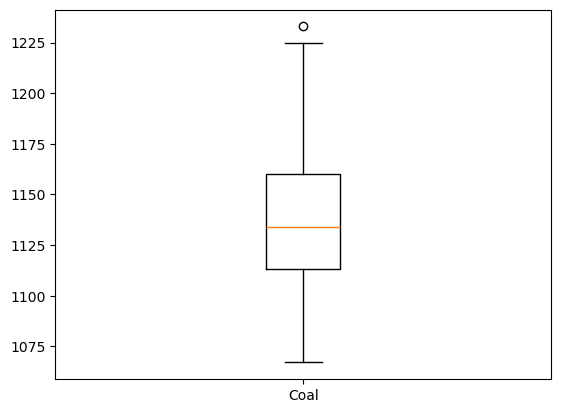

In [39]:
# coal
# removing 3-sigma outliers
z_coal = stats.zscore(df['Coal'])
coal_outliers = (z_coal<-3)|(z_coal>3)
df = df[~coal_outliers]

plt.boxplot(df['Coal'],tick_labels=['Coal'])
plt.show()

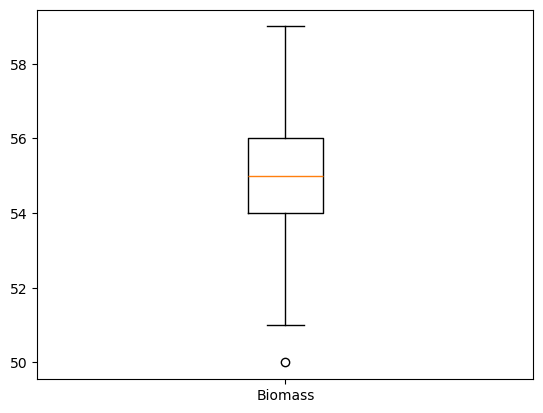

In [40]:
# biomass
# removing 3-sigma outliers
z_biomass = stats.zscore(df['Biomass'])
biomass_outliers = (z_biomass<-3)|(z_biomass>3)
df = df[~biomass_outliers]

plt.boxplot(df['Biomass'],tick_labels=['Biomass'])
plt.show()

In [41]:
# save cleaned dataset
#df.to_csv(r"raw\electricity-normal-sample-cleaned.csv",
#          index=False)

In [42]:
# load dataset
df = pd.read_csv(r"CSV_files-Endterm\electricity-normal-sample-cleaned.csv",
                 delimiter=",")
df

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,1307,612,1939,1127,1076,126,52
1,1288,680,1724,1167,1233,173,57
2,1255,721,1961,1170,1193,178,56
3,1336,692,1715,1077,1138,112,54
4,1238,682,1859,1136,1126,188,55
5,1273,752,1920,1197,1105,137,57
6,1233,601,2048,1098,1102,172,56
7,1337,685,1935,1234,1099,223,53
8,1274,771,1896,1149,1182,173,57
9,1333,761,1944,1078,1207,189,54


In [43]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nuclear        49 non-null     int64
 1   Wind           49 non-null     int64
 2   Hydroelectric  49 non-null     int64
 3   Oil and Gas    49 non-null     int64
 4   Coal           49 non-null     int64
 5   Solar          49 non-null     int64
 6   Biomass        49 non-null     int64
dtypes: int64(7)
memory usage: 2.8 KB


In [44]:
# summary of statistics
df.describe()

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1267.408163,706.408163,1853.551020,1128.734694,1138.000000,168.367347,54.918367
std,34.762239,78.584593,113.120154,62.054672,39.800544,39.045216,2.069991
min,1197.000000,555.000000,1601.000000,1000.000000,1067.000000,95.000000,50.000000
25%,1242.000000,664.000000,1778.000000,1090.000000,1113.000000,139.000000,54.000000
50%,1268.000000,705.000000,1851.000000,1128.000000,1134.000000,169.000000,55.000000
75%,1293.000000,752.000000,1939.000000,1167.000000,1160.000000,193.000000,56.000000
max,1337.000000,922.000000,2063.000000,1297.000000,1233.000000,254.000000,59.000000


# 1-Sample t-Test

## Nuclear

In [45]:
# shapiro-wilk normality test
w_stat, p_value = stats.shapiro(df['Nuclear'])

print(f"w_stat: {w_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

w_stat: 0.9853
P-value: 0.7948
Normal data


In [46]:
"""
left-tailed test
------------------
Ho: us = 1283.78
Ha: us < 1283.78 
"""
pop_mean = 1283.78
t_test, p_value = stats.ttest_1samp(df['Nuclear'],pop_mean,
                                    alternative='less')
print(f"t statistic: {t_test:.4f}")
print(f"P-value: {p_value:.4f}")

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Nuclear-type does not meet the electricity production demand.")
else:
    # fail to reject null hypothesis
    print("Nuclear-type meets the electricity production demand.")
    

# cohen's d
sample_mean = df['Nuclear'].mean()
pop_mean = 1283.78
pop_std = 32.50

d = abs((sample_mean - pop_mean)/pop_std)

print(f"Cohen's d: {d:.4f}")

# power of a test
power = TTestPower().power(
    effect_size = -d, # difference must be negative for alternative='smaller'
    nobs = df['Nuclear'].count(),
    alpha = 0.05,
    alternative = "smaller"
)

print(f"Power of the test: {power*100:.2f}%")


t statistic: -3.2968
P-value: 0.0009
Nuclear-type does not meet the electricity production demand.
Cohen's d: 0.5037
Power of the test: 96.65%


# 2-Sample t-Test

## Nuclear and Coal

In [47]:
df[['Nuclear','Coal']].describe()

,Nuclear,Coal
count,49.000000,49.000000
mean,1267.408163,1138.000000
std,34.762239,39.800544
min,1197.000000,1067.000000
25%,1242.000000,1113.000000
50%,1268.000000,1134.000000
75%,1293.000000,1160.000000
max,1337.000000,1233.000000


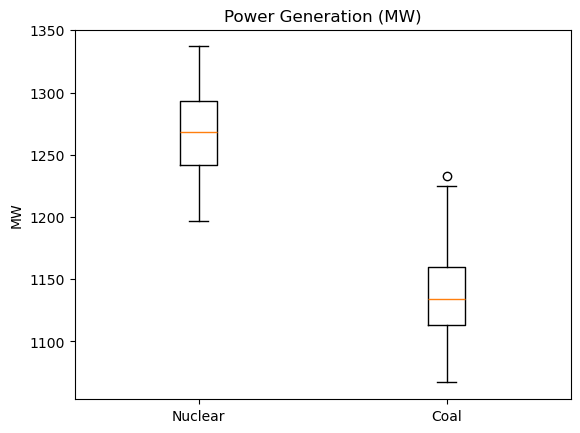

In [48]:
# check for outliers
plt.boxplot(df[['Nuclear','Coal']],tick_labels=['Nuclear','Coal'])
plt.title("Power Generation (MW)")
plt.ylabel('MW')
plt.show()

In [49]:
# shapiro-wilk normality test
print("Nuclear:")
w_stat, p_value = stats.shapiro(df['Nuclear'])

print(f"w_stat: {w_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")
    
print("\nCoal:")
w_stat, p_value = stats.shapiro(df['Coal'])

print(f"w_stat: {w_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Nuclear:
w_stat: 0.9853
P-value: 0.7948
Normal data

Coal:
w_stat: 0.9568
P-value: 0.0698
Normal data


In [50]:
"""
F-Test for equality of variances
--------------------------------
Ho: var_nuclear = var_coal
Ha: var_nuclear != var_coal
"""

var_nuc = df['Nuclear'].var(ddof=1)
var_coal = df['Coal'].var(ddof=1)

# F-statistic
if var_nuc > var_coal:
    f_stat = var_nuc/var_coal
else:
    f_stat = var_coal/var_nuc

print(f'f_stat = {f_stat:.4f}')

# Degrees of Freedom
dof_nuc = df['Nuclear'].count()-1
dof_coal = df['Coal'].count()-1

# probability value
p_value = 1 - stats.f.cdf(f_stat, dof_nuc, dof_coal)
print(f'p_value = {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("unequal variances")
else:
    # fail to reject null hypothesis
    print("equal variances")

f_stat = 1.3109
p_value = 0.1758
equal variances


In [51]:
"""
2- Sample T-Test for Independent Samples
----------------------------------------
Ho: Nuclear <= Coal
Ha: Nuclear > Coal
"""

t_stat, p_value = stats.ttest_ind(df['Nuclear'],df['Coal'],
                                  alternative='greater',
                                  equal_var=True)

print(f't_stat = {t_stat:.4f}')
print(f'p_value = {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Nuclear-type is better than coal-type.")
    # fail to reject null hypothesis
else:
    print("There is no significant difference between nuclear-type and coal-type.")

t_stat = 17.1421
p_value = 0.0000
Nuclear-type is better than coal-type.


In [52]:
"""
left-tailed test
------------------
Ho: u_nuc = u_coal
Ha: u_nuc > u_coal
"""
    
# cohen's d
nuc_mean = df['Nuclear'].mean()
coal_mean = df['Coal'].mean()
nuc_std = df['Nuclear'].std(ddof=1)

d = abs((nuc_mean - coal_mean)/nuc_std)

print(f"Cohen's d: {d:.4f}")

# power of a test
power = TTestPower().power(
    effect_size = -d, # difference must be negative for alternative='smaller'
    nobs = df['Nuclear'].count(),
    alpha = 0.05,
    alternative = "smaller"
)

print(f"Power of the test: {power*100:.2f}%")

Cohen's d: 3.7227
Power of the test: 100.00%


# Paired t-Test

In [53]:
# load dataset
df = pd.read_csv(r"CSV_files-Endterm\nuclear-maintenance.csv",
                 delimiter=",")
df

,Before,After
0,1307,1338
1,1288,1260
2,1255,1191
3,1336,1183
4,1238,1345
5,1273,1315
6,1233,1264
7,1337,1317
8,1274,1345
9,1333,1275


In [54]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Before  49 non-null     int64
 1   After   49 non-null     int64
dtypes: int64(2)
memory usage: 916.0 bytes


In [55]:
# summary of statistics
df.describe()

,Before,After
count,49.000000,49.000000
mean,1267.408163,1284.714286
std,34.762239,47.050505
min,1197.000000,1183.000000
25%,1242.000000,1258.000000
50%,1268.000000,1283.000000
75%,1293.000000,1328.000000
max,1337.000000,1363.000000


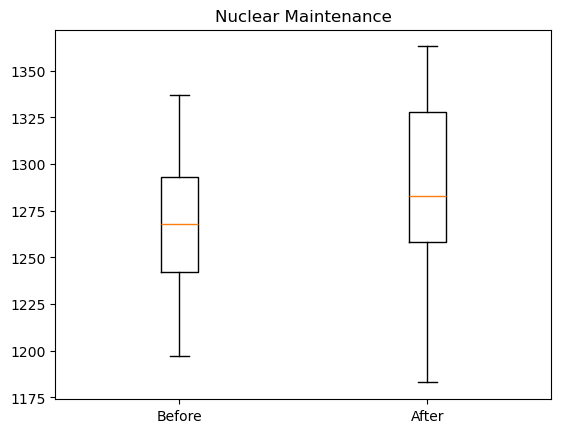

In [56]:
# check for outliers
plt.boxplot(df[['Before','After']],tick_labels=df.columns)
plt.title("Nuclear Maintenance")
plt.show()

In [57]:
"""
F-Test for equality of variances
--------------------------------
Ho: var_before = var_after
Ha: var_before != var_after
"""

var_before = df['Before'].var(ddof=1)
var_after = df['After'].var(ddof=1)

# F-statistic
if var_before > var_after:
    f_stat = var_after/var_before
else:
    f_stat = var_before/var_after

print(f'F-statistic = {f_stat:.4f}')

# Degrees of Freedom
dof_before = df['Before'].count()-1
dof_after = df['After'].count()-1

# probability value
p_value = 1 - stats.f.cdf(f_stat, dof_before, dof_after)
print(f'p-value = {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("unequal variances")
else:
    # fail to reject null hypothesis
    print("equal variances")

F-statistic = 0.5459
p-value = 0.9808
equal variances


In [58]:
"""
Paired T-Test (Nuclear Maintenance)
"""
t_stat, p_value = stats.ttest_rel(df['Before'],df['After'])
print(f't_stat = {t_stat:.4f}')
print(f'p_value = {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("There is a significant improvement after the maintenance.")
    # fail to reject null hypothesis
else:
    print("There is no significant difference before and after the maintenance.")

t_stat = -2.0990
p_value = 0.0411
There is a significant improvement after the maintenance.
